In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and preprocessing

In [3]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [4]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [7]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [9]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

Positive Correlation


Negative Correlation

In [17]:
# Drop the 'Date' column before calculating the correlation.
correlation = gold_data.drop(['Date'], axis=1).corr()

In [15]:
correlation = gold_data.corr()

ValueError: could not convert string to float: '1/2/2008'

<Axes: >

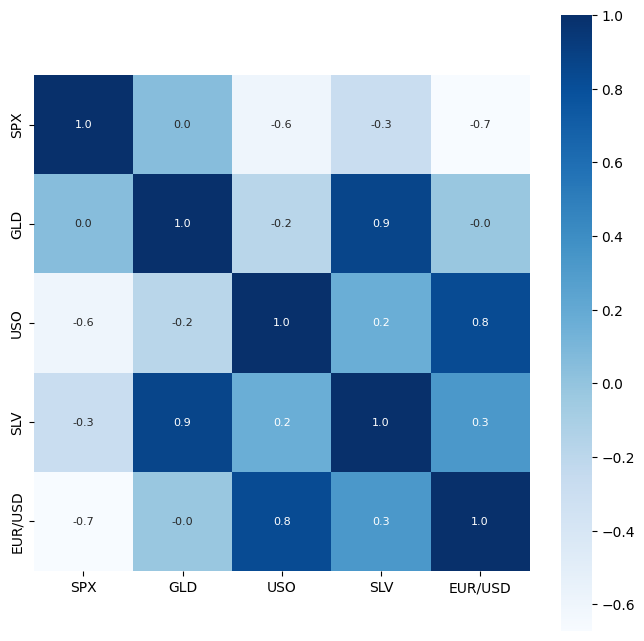

In [18]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [19]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-20-b94eac2e88dd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

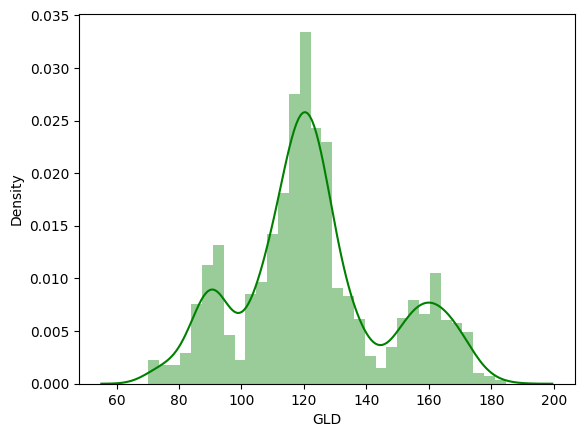

In [20]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

In [21]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [22]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [23]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting the dataset into testing and training datasset

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training: Random forest Regressor

In [25]:
model=RandomForestRegressor(n_estimators=100)

In [26]:
#training the model
model.fit(X_train, Y_train)

RandomForestRegressor()

Model evaluation

In [27]:
#prediction on test data
test_data_prediction = model.predict(X_test)

In [28]:
print(test_data_prediction)

[168.62239959  81.69809984 116.16099985 127.48210065 120.63300148
 154.64809716 150.38249875 126.02690056 117.50639879 126.0478007
 116.67400118 171.54950119 141.61649859 167.89689859 115.09310035
 117.4507007  138.31100249 170.11580013 159.1615029  156.74830006
 155.0925002  125.1057997  175.96579985 156.91840304 125.27810034
  93.71399966  77.45250005 120.53840014 119.12769956 167.37530014
  88.24880034 125.48949981  91.09690039 117.78490021 121.0878989
 136.24480095 115.44510125 114.99110077 148.74889997 107.02420099
 104.22820243  87.16799777 126.57910035 117.92099998 154.2529996
 119.43880028 108.37369986 108.06199827  93.03150019 127.0134982
  74.0334006  113.60319904 121.41909987 111.12979922 118.87469891
 120.29719921 159.20989987 167.00770128 147.12589676  85.97019881
  94.20450032  86.88579877  90.57220056 119.06760069 126.46600061
 127.56389961 169.37319988 122.36909944 117.57939873  98.20350049
 168.40610039 142.93719795 132.24810311 121.09740188 120.91379933
 119.83120025 

In [29]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squarred error:", error_score)

R squarred error: 0.9888056027286861


Compare the Actual values and Predicted values in a Plot

In [30]:
Y_test = list(Y_test)

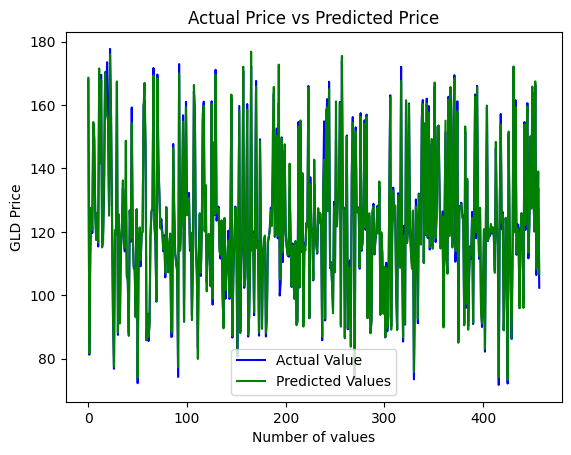

In [31]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Values')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()
